# Hypothesis Testing in Healthcare: Drug Safety

A pharmaceutical company GlobalXYZ has just completed a randomized controlled drug trial. To promote transparency and reproducibility of the drug's outcome, they (GlobalXYZ) have presented the dataset to your organization, a non-profit that focuses primarily on drug safety.

The dataset provided contained five adverse effects, demographic data, vital signs, etc. Your organization is primarily interested in the drug's adverse reactions. It wants to know if the adverse reactions, if any, are of significant proportions. It has asked you to explore and answer some questions from the data.

The dataset `drug_safety.csv` was obtained from [Hbiostat](https://hbiostat.org/data/) courtesy of the Vanderbilt University Department of Biostatistics. It contained five adverse effects: headache, abdominal pain, dyspepsia, upper respiratory infection, chronic obstructive airway disease (COAD), demographic data, vital signs, lab measures, etc. The ratio of drug observations to placebo observations is 2 to 1.

For this project, the dataset has been modified to reflect the presence and absence of adverse effects `adverse_effects` and the number of adverse effects in a single individual `num_effects`.

The columns in the modified dataset are: 

| Column | Description |
|--------|-------------|
|`sex` | The gender of the individual |
|`age` | The age of the individual |
|`week` | The week of the drug testing |
|`trx` | The treatment (Drug) and control (Placebo) groups | 
|`wbc` | The count of white blood cells |
|`rbc` | The count of red blood cells |
|`adverse_effects` | The presence of at least a single adverse effect |
|`num_effects` | The number of adverse effects experienced by a single individual |

The original dataset can be found [here](https://hbiostat.org/data/repo/safety.rda).

Your organization has asked you to explore and answer some questions from the data collected. See the project instructions.

In [106]:
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")
drug_safety.head()

,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,62,male,Drug,0,7.3,5.1,No,0
1,62,male,Drug,1,NaN,NaN,No,0
2,62,male,Drug,12,5.6,5.0,No,0
3,62,male,Drug,16,NaN,NaN,No,0
4,62,male,Drug,2,6.6,5.1,No,0


In [107]:
# Import packages


# Start coding here...
# Two-sample proportions z-test
# Determine if the proportion of adverse_effects differs significantly between the trx groups to know if the pharmaceutical drug created statistically significant side effects.

# Get count of successes and total counts for each trx group
successes = drug_safety.groupby("trx").adverse_effects.value_counts()[1::2].values
total_counts = drug_safety.groupby("trx").adverse_effects.count().values

# Perform two-sample proportions z-test
z_stat, p_val = proportions_ztest(count=successes, nobs=total_counts)

# Print the z-statistic and p-value
print(f"z-statistic: {z_stat:.2f}")
print(f"p-value: {p_val:.4f}")

# Save results to two_sample_results variable
two_sample_results = (z_stat, p_val)

z-statistic: 0.05
p-value: 0.9639


In [108]:
# Association between adverse effects and the groups
# Test if num_effects and trx are independent to determine whether trx influences the number of effects.



from scipy.stats import chi2_contingency

# Create a contingency table 
contingency_table = pd.crosstab(drug_safety['num_effects'], drug_safety['trx'])

# Perform chi-squared test of independence
chi2, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print(f"p-value: {p_val:.4f}")


# Perform chi-square test of independence
chi2, p_val, dof = pingouin.chi2_independence(data=drug_safety, x='num_effects', y='trx')


# Print the test statistic
print(f"Chi-square test statistic: {dof.iloc[0]['chi2']:.2f}")
print(f"p-value: {dof.iloc[0]['pval']:.4f}")
num_effects_groups = (dof.iloc[0]['chi2'],dof.iloc[0]['pval'])
(chi2, p_val, dof )

p-value: 0.6150
Chi-square test statistic: 1.80
p-value: 0.6150


(trx                 Drug      Placebo
 num_effects                          
 0            9703.794883  4863.205117
 1             960.587096   481.412904
 2              58.621126    29.378874
 3               3.996895     2.003105,
 trx          Drug  Placebo
 num_effects               
 0            9703     4864
 1             956      486
 2              63       25
 3               5        1,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
 1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
 2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
 3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
 4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
 5              neyman -2.000000  2.344303  3.0  0.504087  0.012066  0.220189)

Trx 1 normality test: w = 0.98, p-value = 0.0000
Trx 2 normality test: w = 0.98, p-value = 0.0000


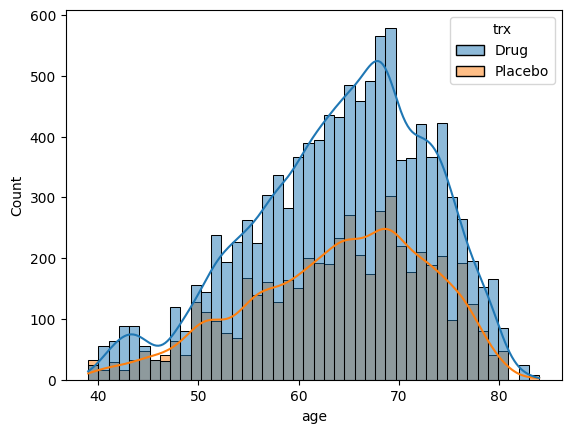

In [109]:
# Inspecting whether age is normally distributed
# To determine what test to use to confirm whether age differs significantly between the trx groups you need to check if age is normally distributed in the trx groups. This can be done visually or by using a statistical test.

# Create histogram of age for each trx group
sns.histplot(data=drug_safety, x="age", hue="trx", kde=True)

# Test for normality
shapiro_results = pg.normality(data=drug_safety, dv='age', group='trx')

# Print the test statistic and p-value
print(f"Trx 1 normality test: w = {shapiro_results.iloc[0]['W']:0.2f}, p-value = {shapiro_results.iloc[0]['pval']:0.4f}")
print(f"Trx 2 normality test: w = {shapiro_results.iloc[1]['W']:0.2f}, p-value = {shapiro_results.iloc[1]['pval']:0.4f}")

In [110]:
pd.read_csv("drug_safety.csv")['trx'].unique()

array(['Drug', 'Placebo'], dtype=object)

In [111]:
# Significant difference between the ages of both groups
# To ensure age wasn't a confounder, conduct a Mann-Whitney test to determine if age differed significantly between the trx groups.
# Perform Mann-Whitney U test


mwu_results = pg.mwu(x=drug_safety.loc[drug_safety['trx'] == 'Drug', 'age'],
                     y=drug_safety.loc[drug_safety['trx'] == 'Placebo', 'age'])

# Print the test statistic and p-value
# print(f"Mann-Whitney U test statistic: {mwu_results['U-val']:.2f}")
# print(f"p-value: {mwu_results['p-val']:.4f}")




# Print the test statistic and p-value
print(f"Mann-Whitney U test statistic: {mwu_results['U-val'].values[0]:.2f}")
print(f"p-value: {mwu_results['p-val'].values[0]:.4f}")

Mann-Whitney U test statistic: 29149339.50
p-value: 0.2570


((0.0452182684494942, 0.9639333330262475),
 (trx                 Drug      Placebo
  num_effects                          
  0            9703.794883  4863.205117
  1             960.587096   481.412904
  2              58.621126    29.378874
  3               3.996895     2.003105,
  trx          Drug  Placebo
  num_effects               
  0            9703     4864
  1             956      486
  2              63       25
  3               5        1,
                   test    lambda      chi2  dof      pval    cramer     power
  0             pearson  1.000000  1.799644  3.0  0.615012  0.010572  0.176275
  1        cressie-read  0.666667  1.836006  3.0  0.607131  0.010678  0.179153
  2      log-likelihood  0.000000  1.922495  3.0  0.588648  0.010926  0.186033
  3       freeman-tukey -0.500000  2.001752  3.0  0.572043  0.011149  0.192379
  4  mod-log-likelihood -1.000000  2.096158  3.0  0.552690  0.011409  0.199984
  5              neyman -2.000000  2.344303  3.0  0.504087  0.01206

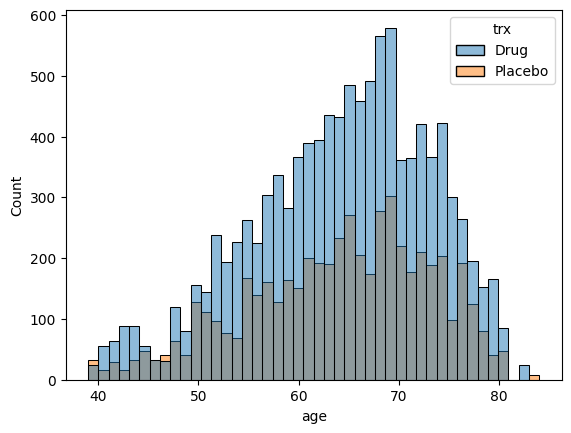

In [112]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")

# Count the adverse_effects column values for each trx group
adv_eff_by_trx = drug_safety.groupby("trx").adverse_effects.value_counts()

# Compute total rows in each group
adv_eff_by_trx_totals = adv_eff_by_trx.groupby("trx").sum()

# Create an array of the "Yes" counts for each group
yeses = [adv_eff_by_trx["Drug"]["Yes"], adv_eff_by_trx["Placebo"]["Yes"]]

# Create an array of the total number of rows in each group
n = [adv_eff_by_trx_totals["Drug"], adv_eff_by_trx_totals["Placebo"]]

# Perform a two-sided z-test on the two proportions
two_sample_results = proportions_ztest(yeses, n)

# Determine if num_effects and trx are independent
num_effects_groups = pingouin.chi2_independence(
    data=drug_safety, x="num_effects", y="trx")

# Create a histogram with Seaborn
sns.histplot(data=drug_safety, x="age", hue="trx")

# Optionally - confirm the histogram's output by conducting a normality test
# To choose between unpaired t-test and Wilcoxon-Mann-Whitney test
normality = pingouin.normality(
    data=drug_safety,
    dv='age',
    group='trx',
    method='shapiro', # the default
    alpha=0.05) # 0.05 is also the default

# Select the age of the Drug group
age_trx = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]

# Select the age of the Placebo group
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Since the data distribution is not normal
# Conduct a two-sided Mann-Whitney U test
age_group_effects = pingouin.mwu(age_trx, age_placebo)
(two_sample_results,num_effects_groups,age_group_effects)